**Day 4 - June 8 2022**

| Student                       | ID        |
| -------------                 |:---------:|
| Benjamin Starostka Jakobsen   | s184198   |
| Muhammad REDACTED             | REDACTED  |
| Victor REDACTED               | REDACTED  |

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Code from exercise 4
import scipy
import seaborn as sns
from scipy import stats

sns.set_style("white")

# Exercise 5
# Variance reduction methods

Confidence interval:
$$
\bar{\theta} = \frac{\sum_{i=0}^n\hat{\theta_i}}{n}
$$
$$
S_{\theta}^2 = \frac{1}{n-1}(\sum_{i=0}^n\hat{\theta_i}^2 - n\bar{\theta})
$$
$$
\left[\bar{\theta} + \frac{S_{\theta}}{\sqrt{n}} t_{\frac{\alpha}{2}}\: ; \: \bar{\theta} + \frac{S_{\theta}}{\sqrt{n}} t_{1-\frac{\alpha}{2}} \right]
$$
where $t$ is the quantile from the t-distribution with $n-1$ degrees of freedom.

In [ ]:
def confidence_interval(estimates, perc=0.95):
    estimates = np.array(estimates)
    n = len(estimates)
    mean = np.mean(estimates)
    var = (1 / (n - 1)) * (np.sum(estimates**2) - n * (mean**2))
    std = np.sqrt(var)

    t_lower = stats.t.ppf((1 - perc) / 2, df=n - 1)
    t_upper = stats.t.ppf(1 - (1 - perc) / 2, df=n - 1)

    lower = mean + (std / np.sqrt(n)) * t_lower
    upper = mean + (std / np.sqrt(n)) * t_upper
    return lower, upper

Analytical solution:
$$
\int_0^{1}e^x dx = e-1 \approx 1.718
$$

In [ ]:
truth = np.exp(1) - 1
print(truth)

1.718281828459045


In [ ]:
confidence_inters = {}
estimates_var = {}

## 1.
**Estimate the integral $\int_{0}^{1}e^xdx$ by simulation (the crude Monte Carlo
estimator). Use eg. an estimator based on 100 samples and present the result as the point estimator and a confidence interval.**

In [ ]:
def Monte_Carlo_estimator(n):
    U = np.random.uniform(size=n)
    X = np.exp(U)
    return X


n = 100
X = Monte_Carlo_estimator(n)

In [ ]:
point_estimate = np.mean(X)
confidence_inters["Monte Carlo"] = confidence_interval(X, perc=0.95)
estimates_var["Monte Carlo"] = np.var(X)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate-truth)}"
)

Estimated mean: 1.72, Difference from true mean: 0.006563573004921164


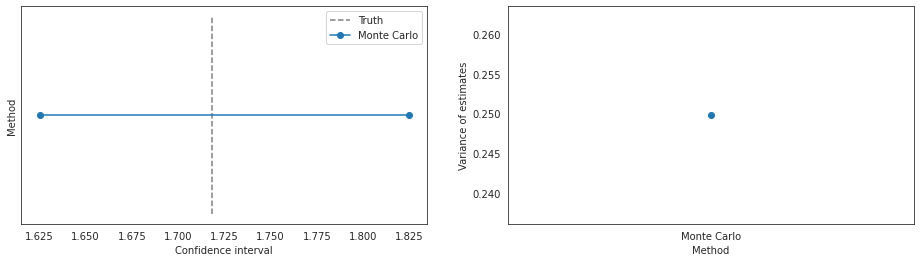

In [ ]:
def visualize_results(confidence_inters, estimates_var, truth):
    methods_idx = {
        k: i
        for k, i in zip(
            confidence_inters.keys(), np.arange(1, len(confidence_inters) + 1)
        )
    }
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    axes[0].vlines(
        x=truth,
        ymin=0,
        ymax=len(confidence_inters) + 1,
        linestyles="--",
        color="grey",
        label="Truth",
    )
    for method, interval in confidence_inters.items():
        axes[0].plot(
            interval, np.full((2,), methods_idx[method]), marker="o", label=method
        )
    axes[0].legend()
    axes[0].set(xlabel="Confidence interval", ylabel="Method")
    axes[0].set_yticks([])

    for method, var in estimates_var.items():
        axes[1].scatter(method, var)
    axes[1].set_xticks(list(methods_idx.keys()), rotation=0)
    axes[1].set(xlabel="Method", ylabel="Variance of estimates")

    plt.show()


visualize_results(confidence_inters, estimates_var, truth)

## 2.
**Estimate the integral $\int_{0}^{1}e^xdx$ using antithetic variables, with
comparable computer ressources.**

In [ ]:
def antithetic_variables_estimator(n):
    U = np.random.uniform(size=n)
    Y = (np.exp(U) + np.exp(1 - U)) / 2
    return Y


Y = antithetic_variables_estimator(n)

In [ ]:
point_estimate = np.mean(Y)
confidence_inters["Antithetic variables"] = confidence_interval(Y, perc=0.95)
estimates_var["Antithetic variables"] = np.var(Y)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate-truth)}"
)

Estimated mean: 1.71, Difference from true mean: 0.005331804607979329


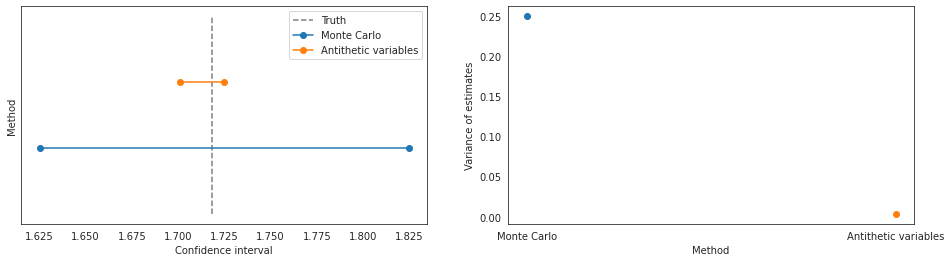

In [ ]:
visualize_results(confidence_inters, estimates_var, truth)

Tighter condidence interval --> lower variance

## 3.
**Estimate the integral $\int_{0}^{1}e^xdx$ using a control variable, with
comparable computer ressources.**

In [ ]:
def control_variable_estimator(n):
    U = np.random.uniform(size=n)
    X = np.exp(U)
    c = -np.cov(X, U)[0][1] / np.var(U)

    Z = X + c * (U - 0.5)
    return Z


Z = control_variable_estimator(n)

In [ ]:
point_estimate = np.mean(Z)
confidence_inters["Control variable"] = confidence_interval(Z, perc=0.95)
estimates_var["Control variable"] = np.var(Z)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate - truth)}"
)

Estimated mean: 1.70, Difference from true mean: 0.013729910092295405


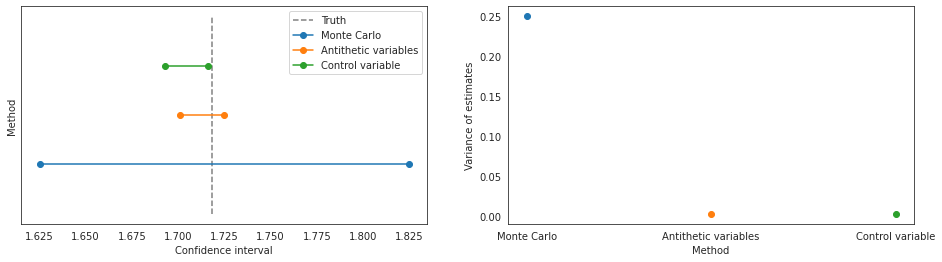

In [ ]:
visualize_results(confidence_inters, estimates_var, truth)

Tighter condidence interval --> lower variance

## 4.
**Estimate the integral $\int_{0}^{1}e^xdx$ using stratified sampling, with
comparable computer ressources.**

In [ ]:
def stratified_sampling_estimator(n, n_strata):
    U = np.random.uniform(size=(n_strata, n))
    W = np.zeros((n,))
    for i in range(n):
        W[i] = (
            np.sum(np.exp(np.arange(n_strata) / n_strata + U[:, i] / n_strata))
            / n_strata
        )

    return W


W = stratified_sampling_estimator(n, n_strata=10)

In [ ]:
point_estimate = np.mean(W)
confidence_inters["Stratified sampling"] = confidence_interval(W, perc=0.95)
estimates_var["Stratified sampling"] = np.var(W)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate-truth)}"
)

Estimated mean: 1.72, Difference from true mean: 0.00010929872618303804


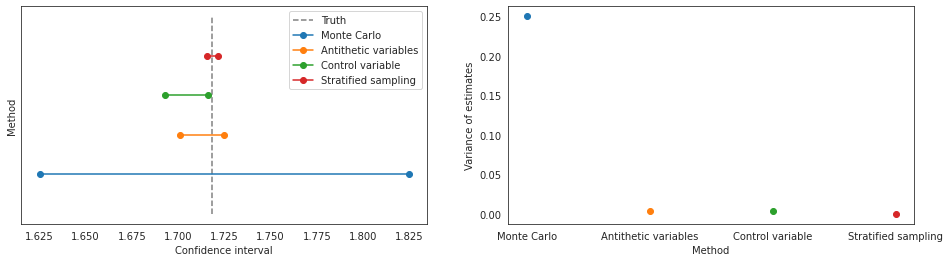

In [ ]:
visualize_results(confidence_inters, estimates_var, truth)

Even tighter condidence interval --> lower variance

## 5.
**Use control variates to reduce the variance of the estimator in
exercise 4 (Poisson arrivals).**

In [ ]:
# Code from exercise 4
m = 10
mean_service_time = 8
mean_time_between_customers = 1
n_customers = 10 * 10000

In [ ]:
def ErlangsBFormula(A, m):
    num = A**m / np.math.factorial(m)
    i = np.arange(0, m + 1)
    den = np.sum(A**i / scipy.special.factorial(i))
    B = num / den
    return B


A = mean_time_between_customers * mean_service_time
truth_block_ratio = ErlangsBFormula(A, m)
print(truth_block_ratio)

0.12166106425295149


In [ ]:
# Code from exercise 4
# Modified to also return the empirical mean service time


def blocking_system(arrival_times, service_times, m, plot=False, prints=False):
    n_customers = len(arrival_times)
    service_units = np.zeros((m,))
    blocks_count = 0
    busy_units_count = np.zeros((n_customers,))
    for i, t in enumerate(arrival_times):
        # Update service units
        empty_units_idx = np.argwhere(service_units <= t).flatten()
        busy_units_count[i] = m - len(empty_units_idx)

        # If at least one unit available, place the customer in the first one
        if len(empty_units_idx) > 0:
            service_units[empty_units_idx[0]] = t + service_times[i]
            busy_units_count[i] += 1

        # Otherwise, all units are busy, block the customer
        else:
            blocks_count += 1

        # Debuging
        if prints and (i % 1000 == 0):
            print(f"{i} Time: {t:.4f} Units: {service_units}")

    if plot:
        fig, ax = plt.subplots(2, 1, figsize=(20, 8))
        ax[0].scatter(arrival_times, service_times, s=1)
        ax[0].set(xlabel="Arrival time", ylabel="Service time")

        ax[1].plot(arrival_times, busy_units_count, linewidth=0.05)
        ax[1].hlines(
            y=m,
            xmin=min(arrival_times),
            xmax=max(arrival_times),
            color="red",
            linewidth=1,
        )
        ax[1].set(xlabel="Arrival time", ylabel="Number of busy units")
        plt.show()

    ratio = blocks_count / n_customers
    empirical_mean_service_time = np.mean(service_times)
    return ratio, empirical_mean_service_time

In [ ]:
# Code from exercise 4


def blocking_system_Poisson(
    n_customers,
    m,
    mean_service_time,
    mean_time_between_customers,
    plot=False,
    prints=False,
):

    intervals_between = np.random.exponential(
        scale=mean_time_between_customers, size=n_customers - 1
    )
    arrival_times = np.insert(np.cumsum(intervals_between), 0, 0)

    service_times = np.random.exponential(scale=mean_service_time, size=n_customers)

    return blocking_system(arrival_times, service_times, m, plot=plot, prints=prints)

Re-using the code from exercise 4, we now compute the **ratio of blocked customers AND the empirical mean service time**. The latter will be the control variate because we assume that this value has a high correlation with the block ratio.

Indeed, intuitively, long service times mean more busy service units, thus increasing the number of blocked customers. (**Positive correlation**).

The mean inter-arrival time could also have used. Intuitevely, the more time between customer, the more time for service unit to finish their job and be available, thus decreasing the number of blocked customers. (**Negative correlation**)

In [ ]:
n = 10
X = []
Y = []
for _ in range(n):
    x, y = blocking_system_Poisson(
        n_customers, m, mean_service_time, mean_time_between_customers
    )
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [ ]:
def control_variate_estimator(X, Y, mu_Y):
    c = -np.cov(X, Y)[0][1] / np.var(Y)
    Z = X + c * (Y - mu_Y)
    return Z


Z = control_variate_estimator(X, Y, mean_service_time)

In [ ]:
confidence_inters_block = {}
estimates_var_block = {}

point_estimate = np.mean(X)
confidence_inters_block["Baseline"] = confidence_interval(X, perc=0.95)
estimates_var_block["Baseline"] = np.var(X)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate-truth_block_ratio)}"
)

Estimated mean: 0.12, Difference from true mean: 0.0008220642529515043


In [ ]:
point_estimate = np.mean(Z)
confidence_inters_block["Control variates"] = confidence_interval(Z, perc=0.95)
estimates_var_block["Control variates"] = np.var(Z)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate-truth_block_ratio)}"
)

Estimated mean: 0.12, Difference from true mean: 0.000568830768653425


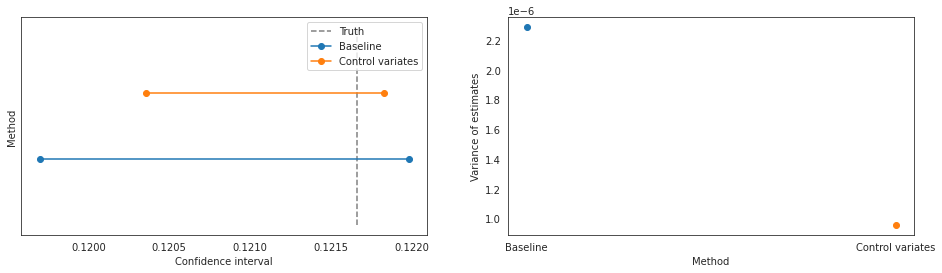

In [ ]:
visualize_results(confidence_inters_block, estimates_var_block, truth_block_ratio)

There is a reduction of the variance of the estimates (right plot, orange dot)

## 6.
**Demonstrate the effect of using common random numbers in
exercise 4 for the difference between Poisson arrivals (Part 1) and a renewal process with hyperexponential interarrival times.**

**Remark: You might need to some thinking and some re-programming.**

In [ ]:
def blocking_system_HyperExp(
    n_customers, m, mean_service_time, p1, lam1, p2, lam2, plot=False, prints=False
):

    intervals_between = np.zeros((n_customers - 1,))
    for i in range(n_customers - 1):
        u = np.random.uniform()
        if u < p1:
            x = np.random.exponential(scale=lam1)
        else:
            x = np.random.exponential(scale=lam2)
        intervals_between[i] = x

    arrival_times = np.insert(np.cumsum(intervals_between), 0, 0)

    service_times = np.random.exponential(scale=mean_service_time, size=n_customers)

    return blocking_system(arrival_times, service_times, m, plot=plot, prints=prints)

In [ ]:
def blocking_system_difference(
    n_customers,
    m,
    mean_service_time,
    mean_time_between_customers,
    p1,
    lam1,
    p2,
    lam2,
    plot=False,
    prints=False,
):

    # Poisson process for arrival times
    intervals_between_poisson = np.random.exponential(
        scale=mean_time_between_customers, size=n_customers - 1
    )
    arrival_times_poisson = np.insert(np.cumsum(intervals_between_poisson), 0, 0)

    # Renewal process for arrival times
    intervals_between_hyperexp = np.zeros((n_customers - 1,))
    for i in range(n_customers - 1):
        u = np.random.uniform()
        if u < p1:
            x = np.random.exponential(scale=lam1)
        else:
            x = np.random.exponential(scale=lam2)
        intervals_between_hyperexp[i] = x
    arrival_times_hyperexp = np.insert(np.cumsum(intervals_between_hyperexp), 0, 0)

    # Same input for service times!
    # Re-using random numbers
    service_times = np.random.exponential(scale=mean_service_time, size=n_customers)

    poisson_simulation = blocking_system(
        arrival_times_poisson, service_times, m, plot=plot, prints=prints
    )
    hyperexp_simulation = blocking_system(
        arrival_times_hyperexp, service_times, m, plot=plot, prints=prints
    )
    return poisson_simulation[0] - hyperexp_simulation[0]

In [ ]:
p1 = 0.8
lam1 = 0.8333
p2 = 0.2
lam2 = 5

In [ ]:
n = 10
deltas_baseline = []
deltas_common = []
for i in range(10):
    # Baseline
    theta1 = blocking_system_Poisson(
        n_customers, m, mean_service_time, mean_time_between_customers
    )[0]
    theta2 = blocking_system_HyperExp(
        n_customers, m, mean_service_time, p1, lam1, p2, lam2
    )[0]
    deltas_baseline.append(theta1 - theta2)

    # Common random numbers
    delta = blocking_system_difference(
        n_customers,
        m,
        mean_service_time,
        mean_time_between_customers,
        p1,
        lam1,
        p2,
        lam2,
    )
    deltas_common.append(delta)

In [ ]:
confidence_intervals_diff = {}
estimates_var_diff = {}

point_estimate_baseline = np.mean(deltas_baseline)
confidence_intervals_diff["Baseline"] = confidence_interval(deltas_baseline, perc=0.95)
print(point_estimate_baseline)
print(confidence_intervals_diff["Baseline"])

0.071291
(0.06962795818678634, 0.07295404181321365)


In [ ]:
point_estimate_common = np.mean(deltas_common)
confidence_intervals_diff["Common"] = confidence_interval(deltas_common, perc=0.95)
print(point_estimate_common)
print(confidence_intervals_diff["Common"])

0.07195299999999999
(0.07061426476899596, 0.07329173523100402)


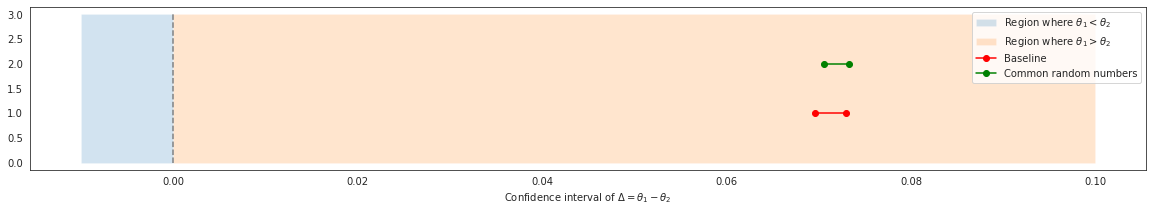

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.vlines(x=0, ymin=0, ymax=3, linestyles="--", color="grey")
ax.fill_between(
    x=np.linspace(-0.01, 0, 100),
    y1=3,
    y2=0,
    label=r"Region where $\theta_1 < \theta_2$",
    alpha=0.2,
)
ax.fill_between(
    x=np.linspace(0.1, 0, 100),
    y1=3,
    y2=0,
    label=r"Region where $\theta_1 > \theta_2$",
    alpha=0.2,
)
ax.plot(
    confidence_intervals_diff["Baseline"],
    np.full((2,), 1),
    marker="o",
    color="red",
    label="Baseline",
)
ax.plot(
    confidence_intervals_diff["Common"],
    np.full((2,), 2),
    marker="o",
    color="green",
    label="Common random numbers",
)
ax.set(xlabel=r"Confidence interval of $\Delta = \theta_1 - \theta_2$", ylabel="")
ax.legend()
plt.show()

Tighter confidence intervals when re-using random numbers (green line).
In both cases, the first model has a bigger estimate $\theta_1$ than the second model $\theta_2$.

## 7.
**For a standard normal random variable $Z ∼ N(0, 1)$ using the crude Monte Carlo estimator estimate the probability $X > a$. Then try importance sampling with a normal density with mean $a$ and variance $\sigma^2$.**

**For the expirements start using $\sigma^2 = 1$, use different values of $a$ (e.g. 2 and 4), and different sample sizes. If time permits experiment with other values for $\sigma^2$. Finally discuss the efficiency of the methods.**

In [ ]:
def crude_Monte_Carlo_estimator_proba(n, a):
    Z = np.random.normal(loc=0, scale=1, size=n)
    X = np.array(Z > a, dtype=int)
    return X

In [ ]:
def importance_sampling_proba(n, a, sigma):

    Y = stats.norm.rvs(loc=a, scale=sigma, size=n)

    h = np.array(Y > a, dtype=int)
    f = stats.norm.pdf(Y, loc=0, scale=1)
    g = stats.norm.pdf(Y, loc=a, scale=sigma)

    return h * f / g

Point estimate MT (a=2, n=100) 0.01
Point estimate IS (a=2, n=100) 0.0264806373865723


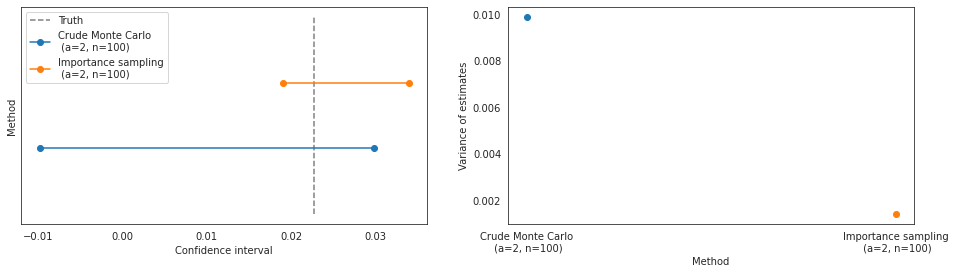

Point estimate MT (a=2, n=1000) 0.023
Point estimate IS (a=2, n=1000) 0.023297826388130646


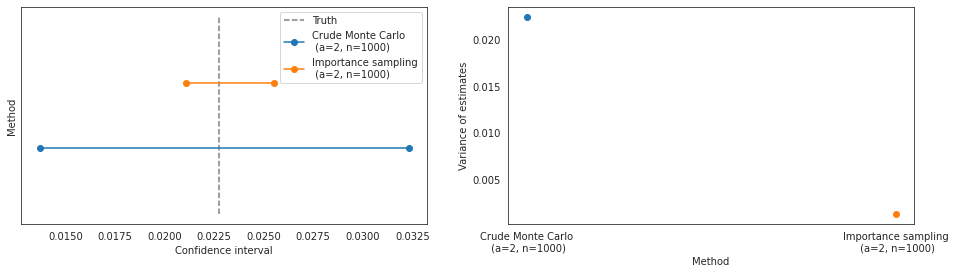

Point estimate MT (a=4, n=100) 0.0
Point estimate IS (a=4, n=100) 3.940330563464546e-05


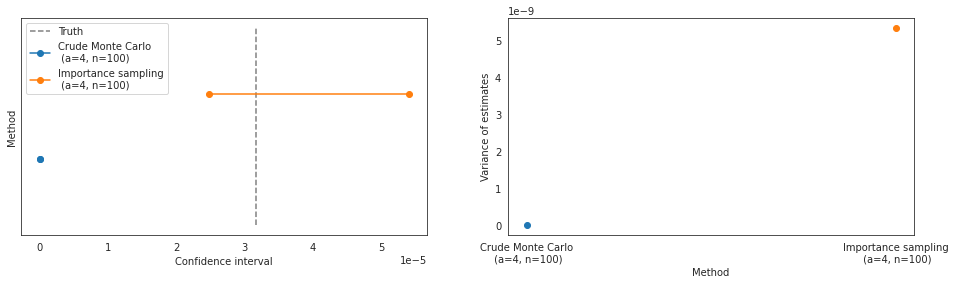

Point estimate MT (a=4, n=1000) 0.0
Point estimate IS (a=4, n=1000) 2.860218281528947e-05


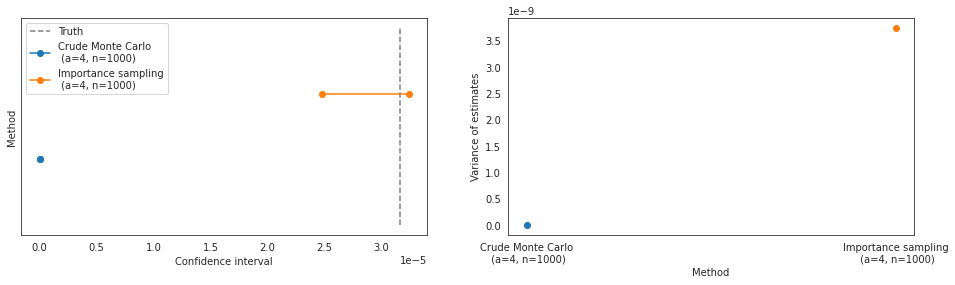

In [ ]:
sigma = 1
for a in [2, 4]:
    for n in [100, 1000]:
        confidence_intervals_proba = {}
        estimates_var_proba = {}

        truth_proba = 1 - stats.norm.cdf(a, loc=0, scale=1)

        X = crude_Monte_Carlo_estimator_proba(n, a)
        IS = importance_sampling_proba(n, a, sigma)

        print(f"Point estimate MT (a={a}, n={n})", np.mean(X))
        print(f"Point estimate IS (a={a}, n={n})", np.mean(IS))

        confidence_intervals_proba[
            f"Crude Monte Carlo\n (a={a}, n={n})"
        ] = confidence_interval(X, perc=0.95)
        estimates_var_proba[f"Crude Monte Carlo\n (a={a}, n={n})"] = np.var(X)

        confidence_intervals_proba[
            f"Importance sampling\n (a={a}, n={n})"
        ] = confidence_interval(IS, perc=0.95)
        estimates_var_proba[f"Importance sampling\n (a={a}, n={n})"] = np.var(IS)

        visualize_results(confidence_intervals_proba, estimates_var_proba, truth_proba)

In [ ]:
stats.norm.pdf(4, loc=0, scale=1)

0.00013383022576488537

Increasing the number of samples $n$ results in tighter intervals. 

We observe than using importance sampling for $a=4$ gives way better results! 

Indeed, the issue when $a=4$ is that it is very unlikely to generate at least one random variable $Z$ larger than 4. Since $P(Z = 4)$ for $Z\sim N(0,1)$ is equal to $1.13 \times 10^{-4}$. But, using importance sampling, "_More important regions will be sampled more often_".

## 8.
**Use importance sampling with $g(x) = \lambda \exp(-\lambda * x)$ to calculate the integral $\int_{0}^{1}e^xdx$. Try to find the optimal value of $\lambda$ by calculating the variance of $h(x)f(x)/g(x)$ and verify by simulation.**

**Note that importance sampling with the exponential distribution will not reduce the variance.**

In [ ]:
def importance_sampling_g(n, lam):
    g_function = lambda x: lam * np.exp(-lam * x)

    Y = stats.expon.rvs(scale=1 / lam, size=n)
    g = g_function(Y)
    # g = stats.expon.pdf(y, scale=1/lam)

    h = np.exp(Y)

    cond1 = np.array(Y >= 0, dtype=int)
    cond2 = np.array(Y <= 1, dtype=int)
    f = np.array(cond1 + cond2 == 2, dtype=int)

    return h * f / g

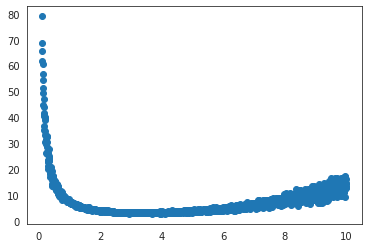

1.640670335167584


In [ ]:
# lambda with lowest variance -> FIND IT ANALITICALLY (it is 1.3)
best_lambda = 1
variance = np.inf
variances = []
for i in np.linspace(0.05, 4, 2000):
    var = np.var(importance_sampling_g(n=1000, lam=i))
    variances.append(var)
    if var < variance:
        best_lambda = i
        variance = var

plt.scatter(np.linspace(0.1, 10, 2000), variances)
plt.show()
print(best_lambda)

In [ ]:
best_lambda

1.640670335167584

In [ ]:
IS = importance_sampling_g(n=100, lam=1.3)

point_estimate = np.mean(IS)
confidence_inters["Importance sampling"] = confidence_interval(IS, perc=0.95)
estimates_var["Importance sampling"] = np.var(IS)

print(
    f"Estimated mean: {point_estimate:3.2f}, Difference from true mean: {abs(point_estimate-truth)}"
)

Estimated mean: 1.61, Difference from true mean: 0.11180223773008979


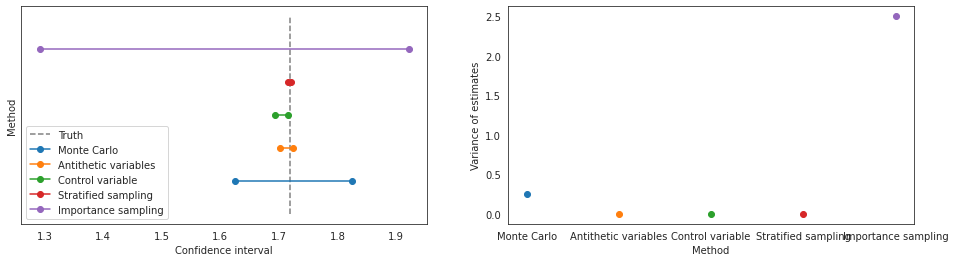

In [ ]:
visualize_results(confidence_inters, estimates_var, truth)

In this particular case, importance sampling works, but it does not reduce the variance of the estimates.

## 9.
**For the Pareto case derive the IS estimator for the mean using the first moment distribution as sampling distribution.**

**Is the approach meaningful? and could this be done in general?**

**With this insight could you change the choice of $g(x)$ in the previous question (Question 8) such that importance sampling would reduce the variance? You do not need to implement this, as long as you can argue, what should happen.**

The baseline approach to compute the mean is computing sample estimator
$$
\bar{X_j} = \sum_{i=1}^{N} X f(x)
$$
we compute $n=1000$ of those, with $N=10$
with $X$ the pareto distributed variables and $f(x)$ the pdf of the pareto.

The first moment distribution is as follows:

The sample means of a dataset of $N$ observations are normally distributed (for any distribution if N large enough).
$$
\bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{N}})
$$

Knowing that, in the case of the Pareto distribution,
 $$
\mu = \{
    \begin{array}{ll}
        \infty,\:\:\: \text{for } k \leq 1\\
        \frac{k}{k-1},\ \text{for } k > 1
    \end{array}
$$

$$
\sigma^2 = \{ \begin{array}{ll}
        \infty,\:\:\: \text{for } k \leq 2\\
        \frac{k}{(k-1)^2 (k-2)},\ \text{for } k > 2
    \end{array}
$$


Then, for importance sampling we can chose the $Y$ variables to be those normally distributed $\bar{X}$ variables.

$g(Y)$ is known, is it the gaussian probability density function.

$h(Y)$ is the identity function, i.e. $h(Y)= Y$

$f(Y)$ is the pareto probability density function.



Below is an implementation (with $k=2.05 > 2$ otherwise the true variance can't be computed).

In [ ]:
def baseline_sampling_pareto(n, N, k):
    means = []
    for _ in range(n):
        x = stats.pareto.rvs(b=k, size=N)
        f = stats.pareto.pdf(x, b=k)
        means.append(x * f)
    return means

In [ ]:
def importance_sampling_pareto(n, N, k, means, true_mean, true_variance):
    Y = stats.norm.rvs(loc=true_mean, scale=true_variance / np.sqrt(N), size=n)

    h = Y  # Identity
    f = stats.pareto.pdf(Y, b=k)  # np.array( [1/n]*n ) # Uniform
    g = stats.norm.pdf(Y, loc=true_mean, scale=true_variance / np.sqrt(N))

    return h * f / g

In [ ]:
n = 1000
N = 10
k = 2.05

mean_pareto_truth = k / (k - 1)
variance_pareto_truth = np.sqrt(k / ((k - 1) ** 2 * (k - 2)))


baseline_means = baseline_sampling_pareto(n, N, k)
IS = importance_sampling_pareto(
    n, N, k, baseline_means, mean_pareto_truth, variance_pareto_truth
)

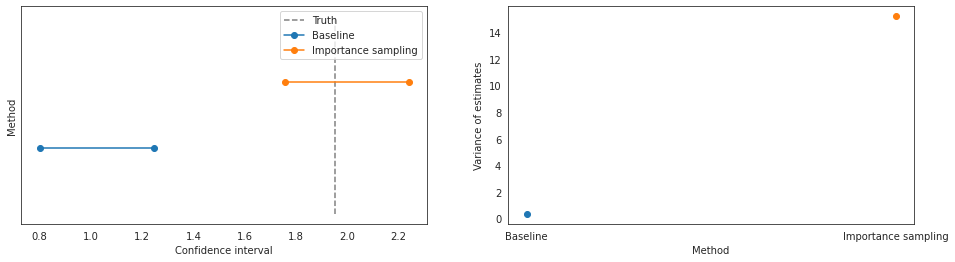

In [ ]:
confidence_intervals_pareto = {}
estimates_var_pareto = {}
confidence_intervals_pareto["Baseline"] = confidence_interval(baseline_means, perc=0.95)
estimates_var_pareto["Baseline"] = np.var(baseline_means)

confidence_intervals_pareto["Importance sampling"] = confidence_interval(IS, perc=0.95)
estimates_var_pareto["Importance sampling"] = np.var(IS)

visualize_results(confidence_intervals_pareto, estimates_var_pareto, mean_pareto_truth)

We observe that the importance sampling estimator are better centered around the true mean of the Pareto distribution. However, this method does not decrease the variance of the estimators.

Indeed, the variance of the baseline estimator is low because none of the variables generated were outliers, thus the computed sample means were all close together.